Importing packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = .5  # the amount of width reserved for blank space between subplots
hspace = 0.6   # the amount of height reserved for white space between subplots

threshs = np.linspace(.0,1.,20) #need to match the ones specified on experiments.py

colors = {'lower': 'red', 'upper': 'blue', 'acc':'green'}
datasets_multi = ['agnews', 'trec', 'semeval', 'chemprot']
metrics_lab = {'youtube':'accuracy', 'imdb':'accuracy', 'yelp':'accuracy',
               'census':'$F_1$', 'tennis':'$F_1$', 'sms':'$F_1$',
               'cdr':'$F_1$', 'basketball':'$F_1$', 'spouse': '$F_1$', 'commercial': '$F_1$'}

In [2]:
results = np.load('../results/results_exp1.npy', allow_pickle=True).item()

## Multinomial classification datasets

In [3]:
results.keys()

dict_keys(['reduced', 'full'])

In [4]:
for set_wl in ['reduced','full']:
    for dataset in datasets_multi:
        data=[]
        for label_model in [None, 'snorkel', 'fs']:
                data.append([np.round(results[set_wl]['bounds'][dataset][label_model]['centers']['lower'], 2),
                         np.round(results[set_wl]['bounds'][dataset][label_model]['centers']['upper'], 2),
                         np.round(results[set_wl]['evaltest'][dataset][label_model]['centers']['lower'], 2)])
        print(set_wl, dataset)
        print(np.array(data), '\n')

reduced agnews
[[0.45 0.94 0.8 ]
 [0.42 0.91 0.77]
 [0.12 0.61 0.76]] 

reduced trec
[[0.04 0.81 0.38]
 [0.02 0.66 0.31]
 [0.16 0.18 0.28]] 

reduced semeval
[[0.25 0.37 0.36]
 [0.29 0.31 0.32]
 [0.12 0.14 0.32]] 

reduced chemprot
[[0.21 0.61 0.42]
 [0.15 0.66 0.41]
 [0.02 0.29 0.39]] 

full agnews
[[0.46 0.95 0.8 ]
 [0.42 0.9  0.76]
 [0.12 0.61 0.76]] 

full trec
[[0.34 0.83 0.68]
 [0.31 0.7  0.47]
 [0.07 0.29 0.27]] 

full semeval
[[0.54 0.78 0.72]
 [0.36 0.7  0.56]
 [0.12 0.14 0.32]] 

full chemprot
[[0.43 0.75 0.6 ]
 [0.37 0.73 0.49]
 [0.05 0.23 0.46]] 



In [13]:
for set_wl in ['reduced','full']:
    for dataset in datasets_multi:
        data=[]
        for label_model in [None, 'snorkel', 'fs']:
                data.append([np.round(results[set_wl]['bounds'][dataset][label_model]['centers']['lower']-results[set_wl]['bounds'][dataset][label_model]['cis']['lower'][0], 2),
                         np.round(results[set_wl]['bounds'][dataset][label_model]['centers']['upper']-results[set_wl]['bounds'][dataset][label_model]['cis']['upper'][0], 2),
                         np.round(results[set_wl]['evaltest'][dataset][label_model]['centers']['lower']-results[set_wl]['evaltest'][dataset][label_model]['cis']['lower'][0], 2)])
        print(set_wl, dataset)
        print(np.array(data), '\n')

reduced agnews
[[0.01 0.01 0.01]
 [0.01 0.01 0.01]
 [0.   0.01 0.01]] 

reduced trec
[[0.02 0.03 0.04]
 [0.01 0.01 0.04]
 [0.   0.   0.04]] 

reduced semeval
[[0.02 0.02 0.04]
 [0.   0.   0.04]
 [0.   0.   0.04]] 

reduced chemprot
[[0.02 0.02 0.02]
 [0.02 0.01 0.02]
 [0.   0.01 0.02]] 

full agnews
[[0.01 0.01 0.01]
 [0.01 0.01 0.01]
 [0.   0.01 0.01]] 

full trec
[[0.04 0.03 0.04]
 [0.04 0.03 0.04]
 [0.02 0.02 0.04]] 

full semeval
[[0.04 0.03 0.04]
 [0.03 0.03 0.04]
 [0.   0.   0.04]] 

full chemprot
[[0.02 0.02 0.02]
 [0.02 0.02 0.02]
 [0.   0.01 0.02]] 



## Binary classification datasets

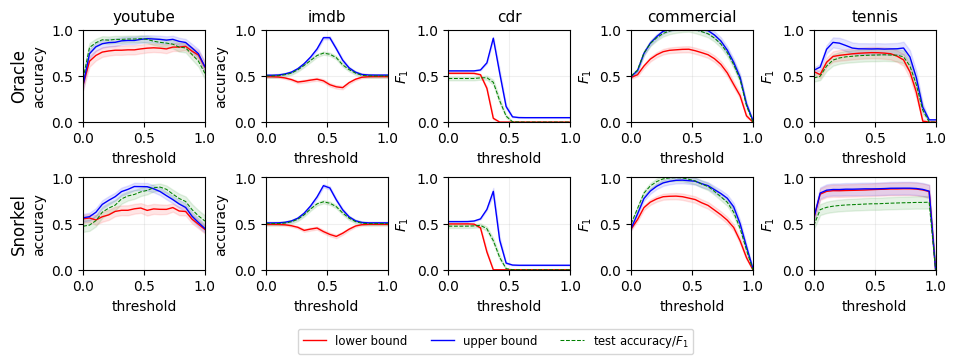

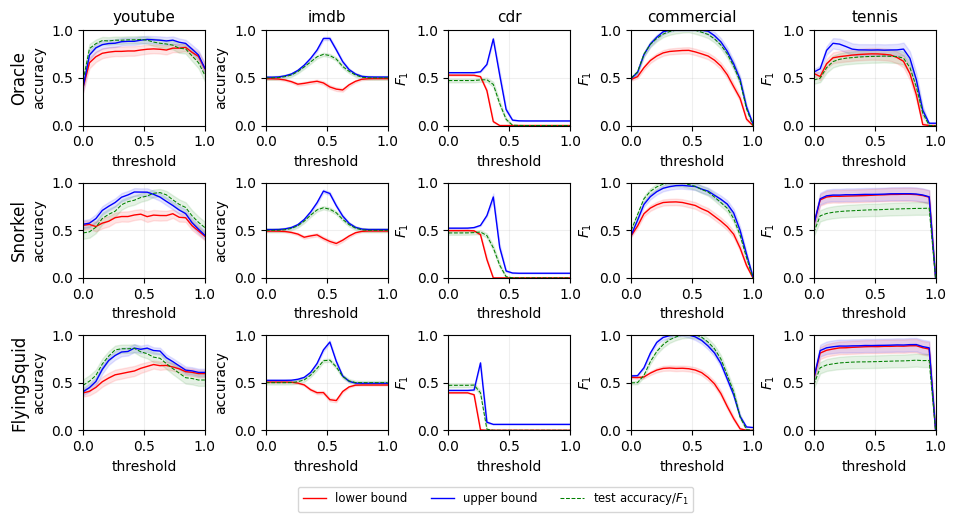

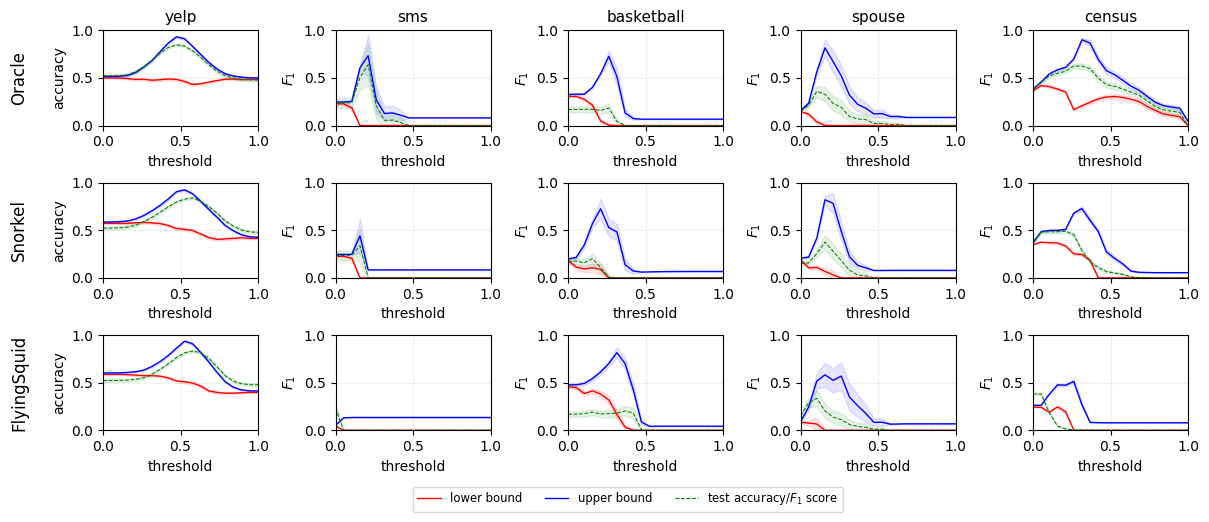

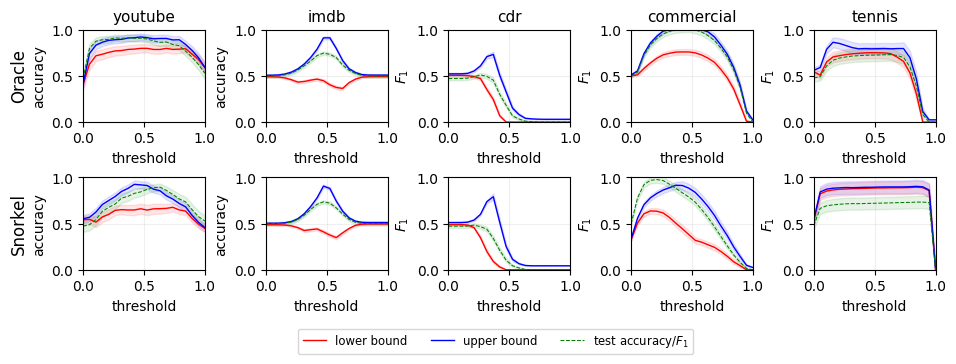

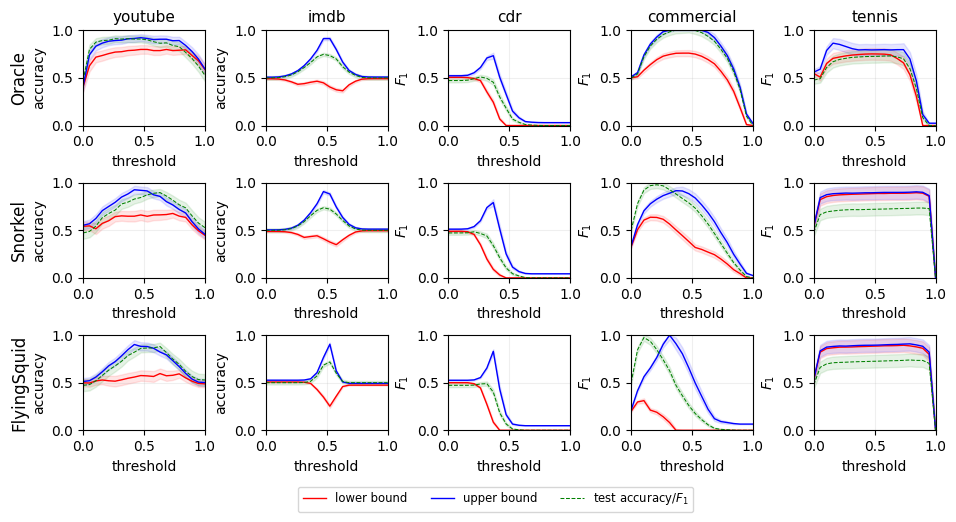

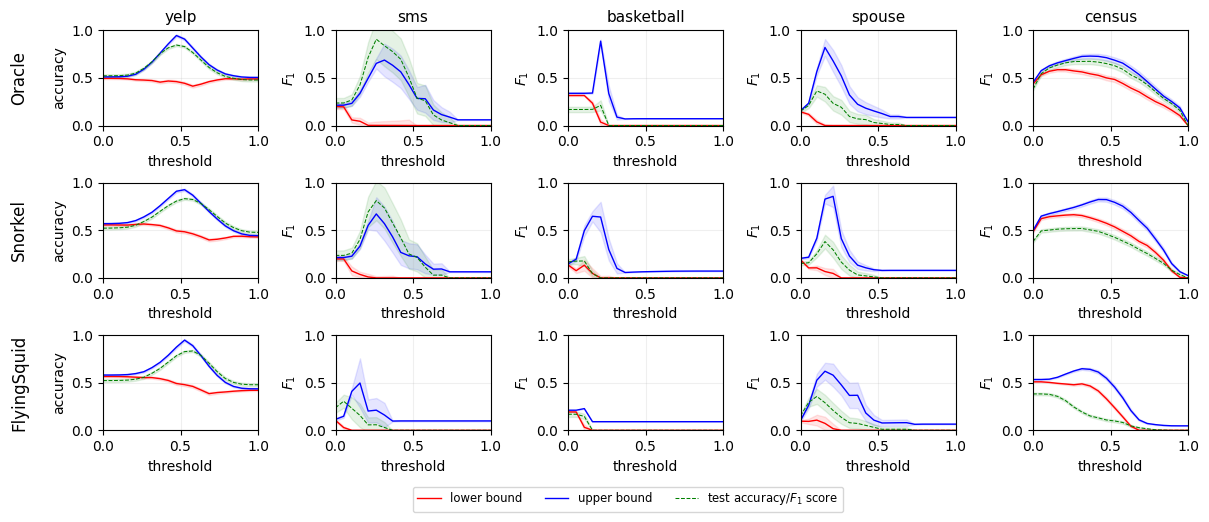

In [11]:
for set_wl in ['reduced', 'full']:
    fig, axarr = plt.subplots(2, 5, figsize=(11, 3))
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    
    # Create handles and labels list for legend
    handles, labels = [], []
    
    # Iterate through datasets for columns and True/False for rows
    for j, dataset in enumerate(['youtube', 'imdb', 'cdr', 'commercial', 'tennis']):
        for i, train_label_model in enumerate([None, 'snorkel']):
            ax = axarr[i, j]  # Transpose the grid by swapping i and j
    
            for bound in ['lower', 'upper']:
                centers = results[set_wl]['bounds'][dataset][train_label_model]['centers'][bound]
                ics = results[set_wl]['bounds'][dataset][train_label_model]['cis'][bound]
                line, = ax.plot(threshs, centers, color=colors[bound], lw=1, label=f"{bound} bound")
                ax.fill_between(threshs, np.array(ics)[:,0], np.array(ics)[:,1], color=colors[bound], alpha=.1)
    
            acc_centers = results[set_wl]['evaltest'][dataset][train_label_model]['centers']['lower']
            acc_ics = results[set_wl]['evaltest'][dataset][train_label_model]['cis']['lower']
            acc_line, = ax.plot(threshs, acc_centers, '--', color=colors['acc'], lw=.75, label="test accuracy/$F_1$")
            ax.fill_between(threshs, np.array(acc_ics)[:,0], np.array(acc_ics)[:,1], color=colors['acc'], alpha=.1)
    
            ax.set_ylim(0, 1)
            ax.set_xlim(0, 1)
            ax.set_ylabel(metrics_lab[dataset], size=10)  # Label the y-axis with 'accuracy'
            ax.set_xlabel('threshold', size=10)
            ax.grid(alpha=.2)
    
            if i == 0:  # Only for the top row
                ax.set_title(dataset, size=11)  # Update the title to use the dataset name
    
            if j == 0:  # Only for the leftmost column
                if train_label_model==None:
                    title = "Oracle"
                elif train_label_model=='snorkel':
                    title = "Snorkel"
                else:
                    title = "FlyingSquid"
                txt = ax.text(-0.6, 0.5, title, va='center', rotation='vertical', transform=ax.transAxes, size=12)  # Label rows with model name
                txt.set_zorder(10)  # This brings the text to the front
    
    
    # Collect handles and labels
    handles, labels = ax.get_legend_handles_labels()
    
    # Create a universal legend outside of the subplots
    fig.legend(handles, labels, loc='lower center', ncol=3, fontsize='small', bbox_to_anchor=(0.5, -0.2))
    
    #plt.tight_layout()
    
    plt.savefig(f'../plots/experiment1_{set_wl}.png', bbox_inches='tight', dpi=300, transparent=True)
    plt.show()
    
    #########################
    # Create the 2x4 grid
    fig, axarr = plt.subplots(3, 5, figsize=(11, 5))
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    
    # Create handles and labels list for legend
    handles, labels = [], []
    
    # Iterate through datasets for columns and True/False for rows
    for j, dataset in enumerate(['youtube', 'imdb', 'cdr', 'commercial', 'tennis']):
        for i, train_label_model in enumerate([None, 'snorkel', 'fs']):
            ax = axarr[i, j]  # Transpose the grid by swapping i and j
    
            for bound in ['lower', 'upper']:
                centers = results[set_wl]['bounds'][dataset][train_label_model]['centers'][bound]
                ics = results[set_wl]['bounds'][dataset][train_label_model]['cis'][bound]
                line, = ax.plot(threshs, centers, color=colors[bound], lw=1, label=f"{bound} bound")
                ax.fill_between(threshs, np.array(ics)[:,0], np.array(ics)[:,1], color=colors[bound], alpha=.1)
    
            acc_centers = results[set_wl]['evaltest'][dataset][train_label_model]['centers']['lower']
            acc_ics = results[set_wl]['evaltest'][dataset][train_label_model]['cis']['lower']
            acc_line, = ax.plot(threshs, acc_centers, '--', color=colors['acc'], lw=.75, label="test accuracy/$F_1$")
            ax.fill_between(threshs, np.array(acc_ics)[:,0], np.array(acc_ics)[:,1], color=colors['acc'], alpha=.1)
    
            ax.set_ylim(0, 1)
            ax.set_xlim(0, 1)
            ax.set_ylabel(metrics_lab[dataset], size=10)  # Label the y-axis with 'accuracy'
            ax.set_xlabel('threshold', size=10)
            ax.grid(alpha=.2)
    
            if i == 0:  # Only for the top row
                ax.set_title(dataset, size=11)  # Update the title to use the dataset name
    
            if j == 0:  # Only for the leftmost column
                if train_label_model==None:
                    title = "Oracle"
                elif train_label_model=='snorkel':
                    title = "Snorkel"
                else:
                    title = "FlyingSquid"
                txt = ax.text(-0.6, 0.5, title, va='center', rotation='vertical', transform=ax.transAxes, size=12)  # Label rows with model name
                txt.set_zorder(10)  # This brings the text to the front
    
    
    # Collect handles and labels
    handles, labels = ax.get_legend_handles_labels()
    
    # Create a universal legend outside of the subplots
    fig.legend(handles, labels, loc='lower center', ncol=3, fontsize='small', bbox_to_anchor=(0.5, -0.075))
    
    #plt.tight_layout()
    
    plt.savefig(f'../plots/experiment1_fs_{set_wl}.png', bbox_inches='tight', dpi=300, transparent=True)
    plt.show()
    #########################
    
    # Create the 2x4 grid
    fig, axarr = plt.subplots(3, 5, figsize=(14, 5))
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    
    # Create handles and labels list for legend
    handles, labels = [], []
    
    # Iterate through datasets for columns and True/False for rows
    for j, dataset in enumerate(['yelp', 'sms', 'basketball', 'spouse', 'census']):
        for i, train_label_model in enumerate([None, 'snorkel', 'fs']):
            ax = axarr[i, j]  # Transpose the grid by swapping i and j
    
            for bound in ['lower', 'upper']:
                centers = results[set_wl]['bounds'][dataset][train_label_model]['centers'][bound]
                ics = results[set_wl]['bounds'][dataset][train_label_model]['cis'][bound]
                line, = ax.plot(threshs, centers, color=colors[bound], lw=1, label=f"{bound} bound")
                ax.fill_between(threshs, np.array(ics)[:,0], np.array(ics)[:,1], color=colors[bound], alpha=.1)
    
            acc_centers = results[set_wl]['evaltest'][dataset][train_label_model]['centers']['lower']
            acc_ics = results[set_wl]['evaltest'][dataset][train_label_model]['cis']['lower']
            acc_line, = ax.plot(threshs, acc_centers, '--', color=colors['acc'], lw=.75, label="test accuracy/$F_1$ score")
            ax.fill_between(threshs, np.array(acc_ics)[:,0], np.array(acc_ics)[:,1], color=colors['acc'], alpha=.1)
    
            ax.set_ylim(0, 1)
            ax.set_xlim(0, 1)
            ax.set_ylabel(metrics_lab[dataset], size=10)  # Label the y-axis with 'accuracy'
            ax.set_xlabel('threshold', size=10)
            ax.grid(alpha=.2)
    
            if i == 0:  # Only for the top row
                ax.set_title(dataset, size=11)  # Update the title to use the dataset name
    
            if j == 0:  # Only for the leftmost column
                if train_label_model==None:
                    title = "Oracle"
                elif train_label_model=='snorkel':
                    title = "Snorkel"
                else:
                    title = "FlyingSquid"
                txt = ax.text(-0.6, 0.5, title, va='center', rotation='vertical', transform=ax.transAxes, size=12)  # Label rows with model name
                txt.set_zorder(10)  # This brings the text to the front
    
    
    # Collect handles and labels
    handles, labels = ax.get_legend_handles_labels()
    
    # Create a universal legend outside of the subplots
    fig.legend(handles, labels, loc='lower center', ncol=3, fontsize='small', bbox_to_anchor=(0.5, -0.075))
    
    #plt.tight_layout()
    
    plt.savefig(f'../plots/experiment1_append_{set_wl}.png', bbox_inches='tight', dpi=300, transparent=True)
    plt.show()